In [1]:
import numpy as np
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt

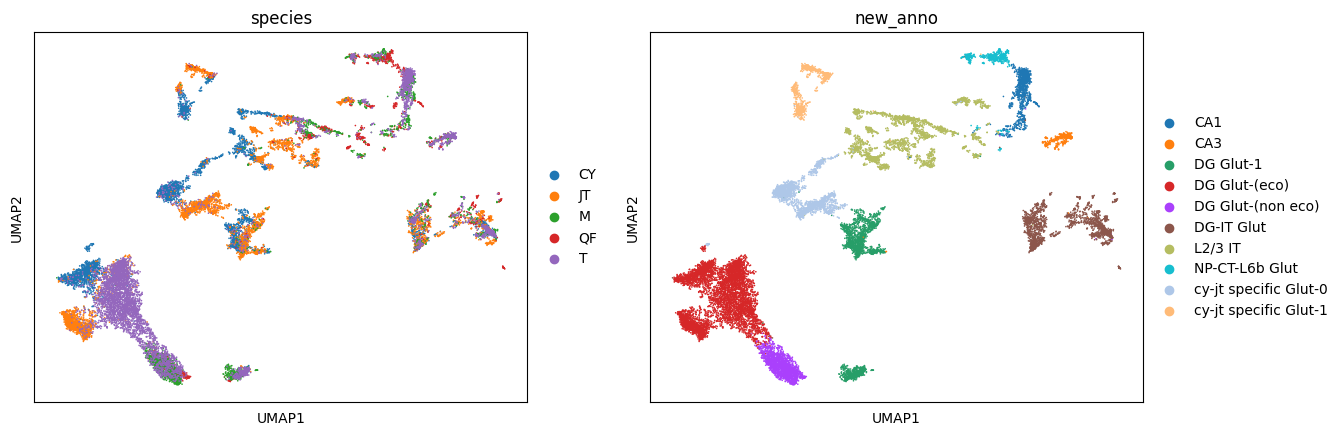

In [2]:

scdata = sc.read_h5ad('/home/rsun@ZHANGroup.local/sly_data/Finished_analysis/glu_neuron/hm_neuron.h5ad')
sc.pl.umap(scdata, color = ['species','new_anno'])


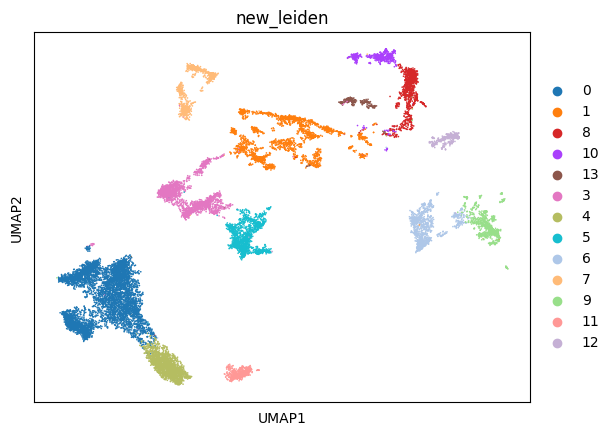

In [5]:
sc.pl.umap(scdata, color = ['new_leiden'])

In [81]:
# 获取 dist 矩阵
raw_dist = scdata.obsp['connectivities'].toarray()

In [92]:
t_idx = np.logical_and(scdata.obs.species == 'T', scdata.obs.new_anno == 'DG Glut-(non eco)')  # 分错的猪尾鼠id
n_idx = np.logical_and(scdata.obs.species.isin(['M','QF']), scdata.obs.new_anno == 'DG Glut-(non eco)') # 全部非回声猪尾鼠id
e_idx = np.logical_and(scdata.obs.species.isin(['T']), scdata.obs.new_anno == 'DG Glut-(eco)') #正确的猪尾鼠id 
all_e_idx = scdata.obs.new_anno == 'DG Glut-(eco)'  ## 全部回声物种id

print(t_idx.sum(), e_idx.sum(), n_idx.sum(), all_e_idx.sum())
idx = np.arange(scdata.shape[0])
t_idx = idx[t_idx]
n_idx = idx[n_idx]
e_idx = idx[e_idx] 
all_e_idx = idx[all_e_idx]

# 获取 dist 矩阵
dist = raw_dist.copy()

# 选取 92 % 的错分的猪尾鼠id 与 正确的猪尾鼠 id 建立连边, 

sel_id = np.random.choice(t_idx, int(0.75*len(t_idx)), replace=False)
dist[sel_id, :] = 0
dist[:,sel_id] = 0

res = []
for i in range(len(sel_id)):
    x = sel_id[i]
    N_x = np.random.choice(e_idx, 10, replace=False)
    tmp = 0.2*np.random.rand(10)
    dist[x, N_x] = tmp 
    dist[N_x, x] = tmp
    
# 非回声的物种和回声物种之间连边置0

#dist[n_idx,:][:,all_e_idx] = 0

#dist[all_e_idx,:][:,n_idx] = 0


660 3274 1298 6006


In [93]:
from scipy.sparse import csr_matrix
csr_dist = csr_matrix(dist)

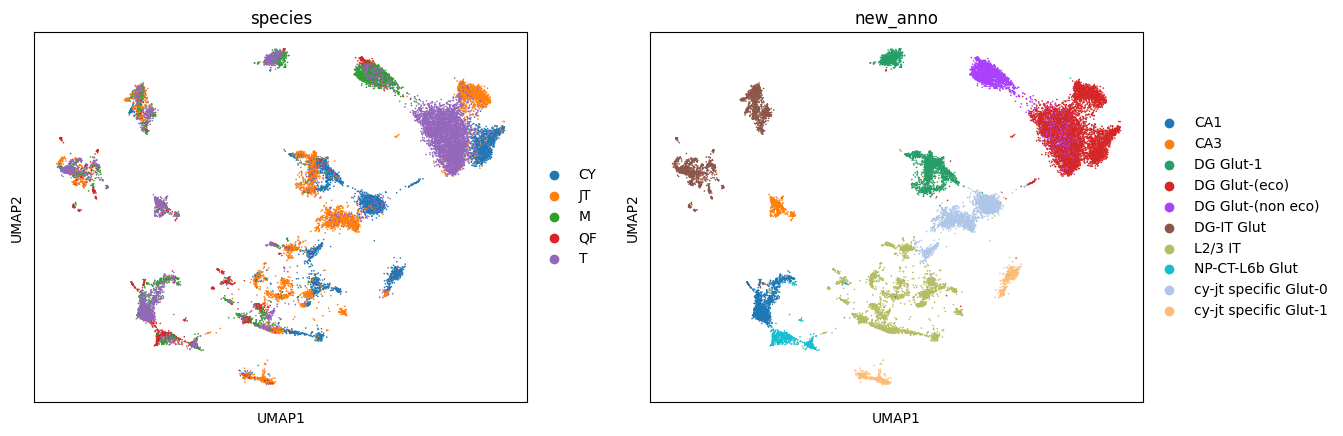

In [94]:
scdata.obsp['connectivities'] = csr_dist 
sc.tl.umap(scdata,min_dist=0.1)
sc.pl.umap(scdata, color = ['species','new_anno'])

6019


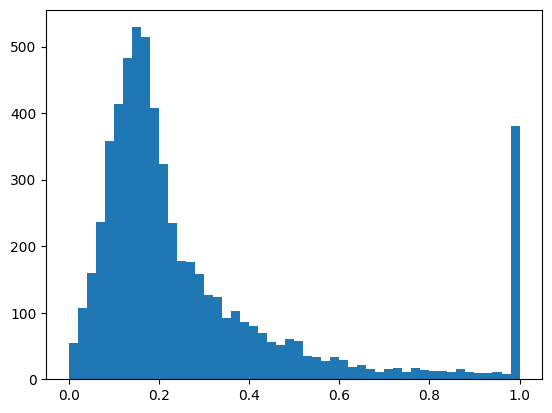

In [49]:
tmp = dist[t_idx,:][:,e_idx].flatten()
print((tmp > 0).sum())
tmp = tmp[tmp > 0]
plt.hist(tmp, bins = 50)
plt.show()

In [44]:
tmp.max()

1.0

(477903321,)
(472430,)


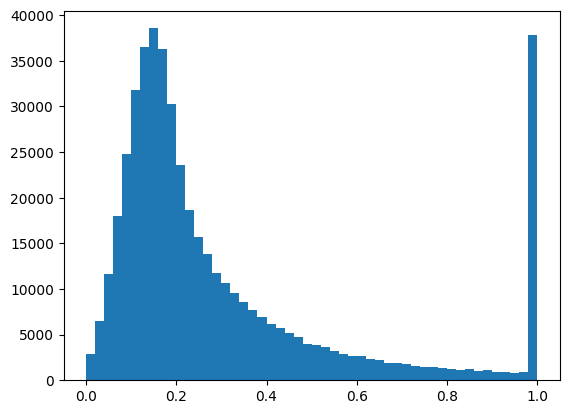

In [32]:
dist = scdata.obsp['connectivities'].toarray()

import matplotlib.pyplot as plt 

tmp = dist.flatten()
print(tmp.shape)
tmp = tmp[tmp>0]
print(tmp.shape)

plt.hist(tmp, bins = 50)
plt.show()

In [ ]:
t_idx = scdata.

### 不成功的尝试

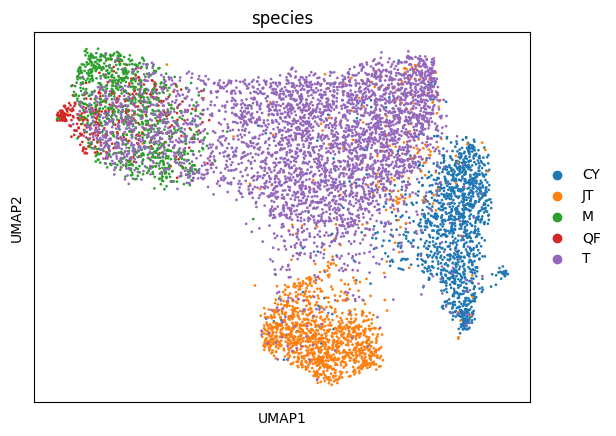

In [18]:
scdata = scdata[scdata.obs.new_anno.isin(['DG Glut-(eco)', 'DG Glut-(non eco)'])]
sc.pp.neighbors(scdata, n_neighbors = 15, use_rep = 'X_pca_harmony')
sc.tl.umap(scdata,min_dist=0.1)
sc.pl.umap(scdata, color = ['species'])

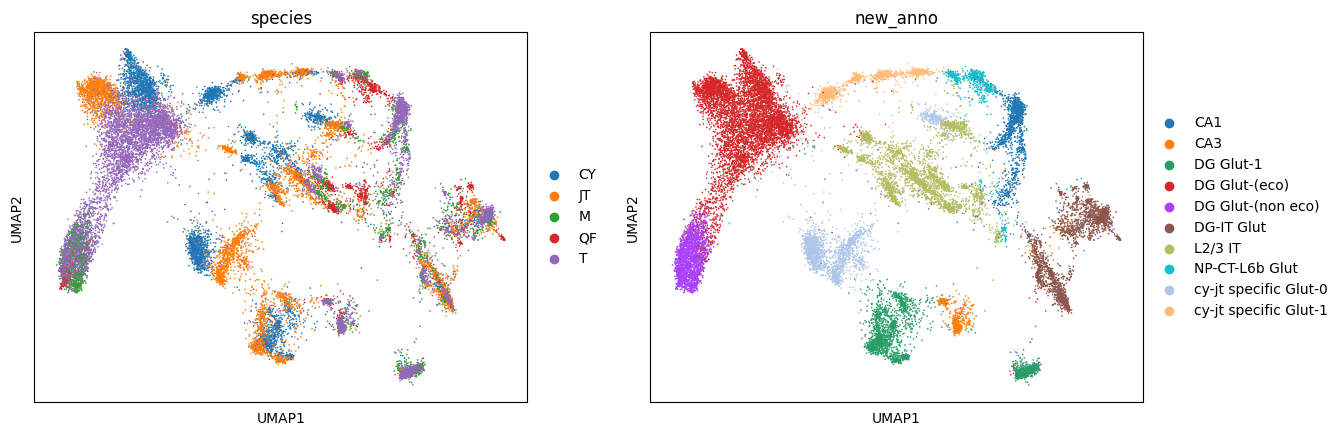

In [13]:
sc.pp.neighbors(scdata, metric = 'cosine',use_rep = 'X_pca_harmony', n_neighbors = 100)
sc.tl.umap(scdata,min_dist=0.1)
sc.pl.umap(scdata, color = ['species','new_anno'])


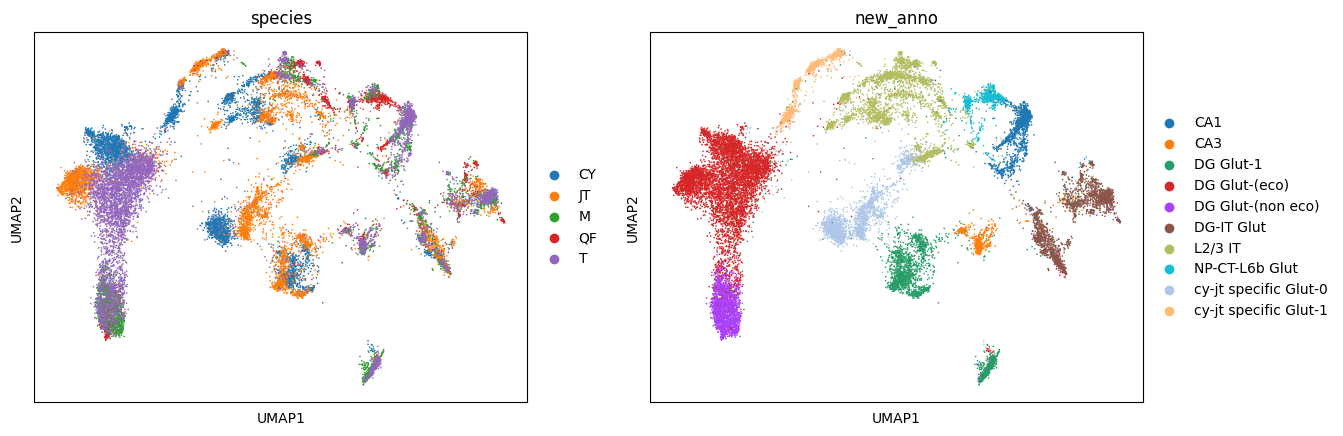

In [14]:

sc.pp.neighbors(scdata, metric = 'cosine',use_rep = 'X_pca_harmony', n_neighbors = 50)
sc.tl.umap(scdata,min_dist=0.1)
sc.pl.umap(scdata, color = ['species','new_anno'])